In [ ]:
from PIL import Image
import cv2
import pytesseract as ocr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
test_set = {
    "traffic_sign.jpg": "90",
    "traffic_sign_1.jpg": "30",
    "traffic_sign_2.jpg": "30",
    "traffic_sign_3.jpg": "60",
    "traffic_sign_4.jpg": "60",
    "traffic_sign_5.jpg": "30",
    "traffic_sign_6.jpg": "30",
    "traffic_sign_7.jpg": "90",
    "traffic_sign_8.jpg": "90",
    "traffic_sign_9.jpg": "90",
    "traffic_sign_10.jpg": "90",
    "traffic_sign_11.jpg": "90",
    "traffic_sign_12.jpg": "90",
    "traffic_sign_13.jpg": "90",
    "traffic_sign_14.jpg": "90",
    "traffic_sign_15.jpg": "90",
    "traffic_sign_16.jpg": "30",
    "traffic_sign_17.jpg": "30",
    "traffic_sign_18.jpg": "30",
    "traffic_sign_19.jpg": "30",
    "traffic_sign_20.jpg": "30",
    "traffic_sign_21.jpg": "30",
    "traffic_sign_22.jpg": "30",
    "traffic_sign_23.jpg": "30",
    "traffic_sign_24.jpg": "30",
    "traffic_sign_25.jpg": "60",
    "traffic_sign_26.jpg": "60",
    "traffic_sign_27.jpg": "60",
    "traffic_sign_28.jpg": "60",
    "traffic_sign_29.jpg": "60",
    "traffic_sign_30.jpg": "60",
    "traffic_sign_31.jpg": "60",
    "traffic_sign_32.jpg": "60",
    "traffic_sign_33.jpg": "60",
    "traffic_sign_34.jpg": "60",
    "traffic_sign_35.jpg": "stop",
    "traffic_sign_36.jpg": "stop",
    "traffic_sign_37.jpg": "stop",
    "traffic_sign_38.jpg": "stop",
    "traffic_sign_39.jpg": "stop",
    "traffic_sign_40.jpg": "stop",
    "traffic_sign_41.jpg": "stop",
    "traffic_sign_42.jpg": "stop",
    "traffic_sign_43.jpg": "stop",
    "traffic_sign_44.jpg": "stop",
    "traffic_sign_45.jpg": "stop",
    "traffic_sign_46.jpg": "stop",
    "traffic_sign_47.jpg": "stop",
    "traffic_sign_48.jpg": "stop",
    "traffic_sign_49.jpg": "stop",
    "traffic_sign_50.jpg": "stop",
    "traffic_sign_51.jpg": "stop",
    "traffic_sign_52.jpg": "stop",
    "traffic_sign_53.jpg": "stop",
    "traffic_sign_54.jpg": "stop",
    "traffic_sign_55.jpg": "stop",
    "traffic_sign_56.jpg": "stop",
    "traffic_sign_57.jpg": "stop",
    "traffic_sign_58.jpg": "stop",
    "traffic_sign_59.jpg": "stop",
    "traffic_sign_60.jpg": "stop",
    "traffic_sign_61.jpg": "stop",
    "traffic_sign_62.jpg": "stop",
    "traffic_sign_63.jpg": "stop",
    "traffic_sign_64.jpg": "stop",
    "traffic_sign_65.jpg": "stop",
    "traffic_sign_66.jpg": "stop",
    "traffic_sign_67.jpg": "stop",
    "traffic_sign_68.jpg": "stop",
    "traffic_sign_69.jpg": "stop",
    "traffic_sign_70.jpg": "stop",
    "traffic_sign_71.jpg": "stop",
    "traffic_sign_72.jpg": "stop",
    "traffic_sign_73.jpg": "stop",
    "traffic_sign_74.jpg": "stop",
    "traffic_sign_75.jpg": "30",
    "traffic_sign_76.jpg": "30",
    "traffic_sign_77.jpg": "30",
    "traffic_sign_78.jpg": "30",
    "traffic_sign_79.jpg": "30",
    "traffic_sign_80.jpg": "30",
    "traffic_sign_81.jpg": "30",
    "traffic_sign_82.jpg": "30",
    "traffic_sign_83.jpg": "30",
    "traffic_sign_84.jpg": "30",
    "traffic_sign_85.jpg": "30",
    "traffic_sign_86.jpg": "30",
    "traffic_sign_89.jpg": "30",
    "traffic_sign_90.jpg": "30",
    "traffic_sign_91.jpg": "30",
    "traffic_sign_92.jpg": "30",
    "traffic_sign_93.jpg": "30",
    "traffic_sign_94.jpg": "30",
    "traffic_sign_95.jpg": "stop",
    "traffic_sign_96.jpg": "stop",
    "traffic_sign_97.jpg": "stop",
    "traffic_sign_98.jpg": "stop",
    "traffic_sign_99.jpg": "stop",
    "traffic_sign_100.jpg": "stop",
    "traffic_sign_101.jpg": "stop",
    "traffic_sign_102.jpg": "stop",
    "traffic_sign_103.jpg": "stop",
    "traffic_sign_104.jpg": "stop",
}

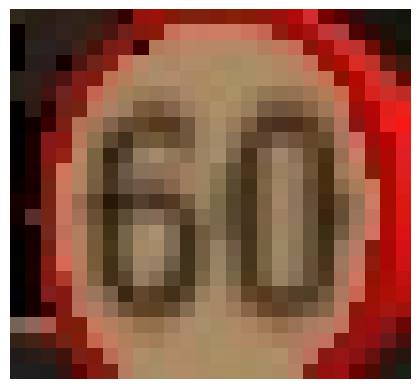

In [54]:
img = cv2.imread("/home/s0203301/project/Data/traffic_signs/traffic_sign_104.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)

plt.imshow(im_pil)
plt.axis("off")  # optional: hide axes
plt.show()

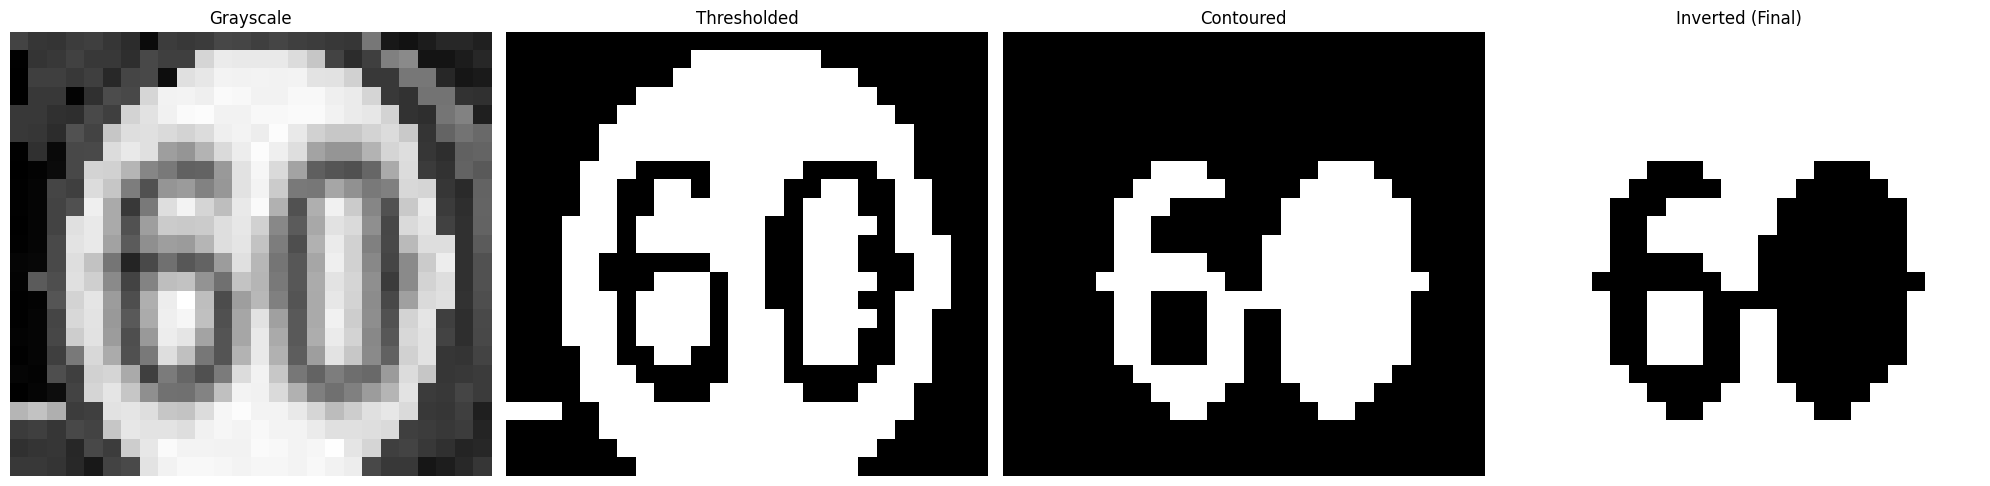

oe


In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_raw = np.array(im_pil)

# Step 1: Grayscale
img_gray = cv2.cvtColor(image_raw, cv2.COLOR_BGR2GRAY)

# Step 2: Contrast & Threshold
img_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
_, img_thresh = cv2.threshold(img_contrast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Find all contours (blobs)
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_digits = np.zeros_like(img_thresh) # Create a blank mask to draw ONLY the digits
img_area = img_thresh.size
for cnt in contours:
    # Get bounding box of the contour
    x, y, cw, ch = cv2.boundingRect(cnt)
    aspect_ratio = cw / float(ch)
    cnt_area = cv2.contourArea(cnt)

    # 1. Size Check: Digits are usually 2% to 20% of the total image area.
    #    The Circle is usually > 40%. Noise is < 0.5%.
    keep_size = (0.01 * img_area) < cnt_area < (0.3 * img_area)

    # 2. Shape Check: Digits are usually taller than they are wide.
    #    A circle has an aspect ratio of roughly 1.0.
    #    Text is usually 0.2 to 0.9.
    keep_shape = 0.1 < aspect_ratio < 0.9

    # 3. Solidity Check (Optional):
    #    Real digits are solid. Noise is often scattered.
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(cnt_area)/hull_area if hull_area > 0 else 0
    keep_solidity = solidity > 0.2

    # Standard aspect ratio for text is tall (0.2 to 0.9)
    is_text_shape = 0.2 < aspect_ratio < 0.9

    # STOP signs are roughly square (1:1 ratio)
    is_stop_shape = 0.9 <= aspect_ratio <= 1.1

    # If it matches EITHER, we keep it
    if (keep_size and keep_solidity) and (is_text_shape or is_stop_shape):
        cv2.drawContours(mask_digits, [cnt], -1, 255, -1)

# Step 4: Dilating to amke test bolder (better for OCR) and Bitwise Not
# kernel = np.ones((2,2), np.uint8)
# mask_digits = cv2.dilate(mask_digits, kernel, iterations=1)

# Invert for final OCR (OCR usually prefers black text on white bg)
img_final = cv2.bitwise_not(mask_digits)

# ---------------------------------------------------------
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of images and titles for easy iteration
images = [img_gray, img_thresh, mask_digits, img_final]
titles = ["Grayscale", "Thresholded", "Contoured", "Inverted (Final)"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

text: str = ocr.image_to_string(img_final, config="--psm 6")
stripped = text.strip().lower()
print(stripped)

In [63]:
from typing import Optional

def image_to_sign(image: np.ndarray) -> Optional[str]:
    image_processed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                                        # Grayscale
    image_processed = cv2.convertScaleAbs(image_processed, alpha=1.5, beta=0)                        # Increase contrast
    _, image_processed = cv2.threshold(image_processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Binarize (threshold)

    # Contouring
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    mask_digits = np.zeros_like(img_thresh) # Create a blank mask to draw ONLY the digits
    img_area = img_thresh.size
    for cnt in contours:
        # Get bounding box of the contour
        x, y, cw, ch = cv2.boundingRect(cnt)
        aspect_ratio = cw / float(ch)
        cnt_area = cv2.contourArea(cnt)

        # 1. Size Check: Digits are usually 2% to 20% of the total image area.
        #    The Circle is usually > 40%. Noise is < 0.5%.
        keep_size = (0.01 * img_area) < cnt_area < (0.3 * img_area)

        # 2. Shape Check: Digits are usually taller than they are wide.
        #    A circle has an aspect ratio of roughly 1.0.
        #    Text is usually 0.2 to 0.9.
        keep_shape = 0.1 < aspect_ratio < 0.9

        # 3. Solidity Check (Optional):
        #    Real digits are solid. Noise is often scattered.
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = float(cnt_area)/hull_area if hull_area > 0 else 0
        keep_solidity = solidity > 0.2

        # Standard aspect ratio for text is tall (0.2 to 0.9)
        is_text_shape = 0.2 < aspect_ratio < 0.9

        # STOP signs are roughly square (1:1 ratio)
        is_stop_shape = 0.9 <= aspect_ratio <= 1.1

        # If it matches EITHER, we keep it
        if (keep_size and keep_solidity) and (is_text_shape or is_stop_shape):
            cv2.drawContours(mask_digits, [cnt], -1, 255, -1)
    # Config
    # psm stands for "page segmentation method", the number behind is for the sub-option
    #   0    Orientation and script detection (OSD) only.
    #   1    Automatic page segmentation with OSD.
    #   2    Automatic page segmentation, but no OSD, or OCR.
    #   3    Fully automatic page segmentation, but no OSD. (Default)
    #   4    Assume a single column of text of variable sizes.
    #   5    Assume a single uniform block of vertically aligned text.
    #   6    Assume a single uniform block of text.
    #   7    Treat the image as a single text line.
    #   8    Treat the image as a single word.
    #   9    Treat the image as a single word in a circle.
    #  10    Treat the image as a single character.
    #  11    Sparse text. Find as much text as possible in no particular order.
    #  12    Sparse text with OSD.
    #  13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

    img_final = cv2.bitwise_not(mask_digits)
    config = r'--psm 6'
    text: str = ocr.image_to_string(img_final, config=config)
    stripped = text.strip().lower()

    # First exact mapping
    exact_match = {"90", "60", "30", "stop"}
    if stripped in exact_match:
        return stripped

    print(stripped)

    # Loose mapping
    if "9" in text:
        return "90"
    elif "6" in text:
        return "60"
    elif "3" in text:
        return "30"
    if 'stop' in text:
        return "stop"

    for candidate in ["st", "sto", "op"]:
        if candidate in text:
            return "stop"
    return None

In [46]:
img = cv2.imread("/home/s0203301/project/Data/traffic_signs/traffic_sign_104.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)
image_cv = np.array(im_pil)
print(image_to_sign(image_cv))

ste
stop


Raw OCR: 'oo'
Raw OCR: 'g0)'
Raw OCR: '@'
Raw OCR: '(60)'
Raw OCR: '130)'
Raw OCR: '©'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '90)'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '©'
Raw OCR: '60)'
Raw OCR: '60)'
Raw OCR: '60)'
Raw OCR: '60)'
Raw OCR: '(60)'
Raw OCR: '(60)'
Raw OCR: '60)'
Raw OCR: '60)'
Raw OCR: '(60)'
Raw OCR: '(60)'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: 'é'
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: ''
Raw OCR: 'y\na'
Raw OCR: ''
Raw OCR: ''
Raw OCR: 'ry\nstop'
Raw OCR: 'lar\nstof'
Raw OCR: 'yr\nss'
Raw OCR: 'yr\nstop'
Raw OCR: ''
Raw OCR: 'an.\nwa'
Raw OCR: 'an.\nwa'
Raw OCR: 'an.\nwa'
Raw OCR: 'an.\nwa'
Raw OCR: 'an.\nwa'
Raw OCR: 'an.\nwa'
Raw OCR: 'an

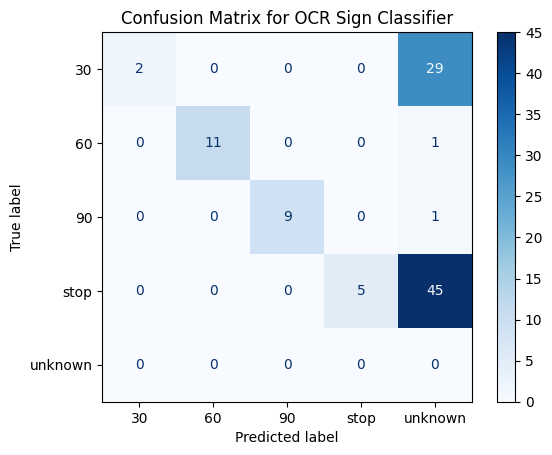

Classification Report:

              precision    recall  f1-score   support

          30       1.00      0.06      0.12        31
          60       1.00      0.92      0.96        12
          90       1.00      0.90      0.95        10
        stop       1.00      0.10      0.18        50
     unknown       0.00      0.00      0.00         0

    accuracy                           0.26       103
   macro avg       0.80      0.40      0.44       103
weighted avg       1.00      0.26      0.33       103



/home/shared/3_12_jupyter/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shared/3_12_jupyter/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shared/3_12_jupyter/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [64]:
# --- Predict ---
y_pred = []
for filename in test_set.keys():
    img = cv2.imread(f"/home/s0203301/project/Data/traffic_signs/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)
    image_cv = np.array(im_pil)
    y_pred.append(image_to_sign(image_cv))

# Replace None with "unknown"
y_pred = [p if p is not None else "unknown" for p in y_pred]
y_true = [t if t is not None else "unknown" for t in test_set.values()]

# --- Compute confusion matrix ---
labels = ["30", "60", "90", "stop", "unknown"]  # include all classes
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for OCR Sign Classifier")
plt.show()

# --- Classification report ---
print("Classification Report:\n")
print(classification_report(y_true, y_pred, labels=labels))